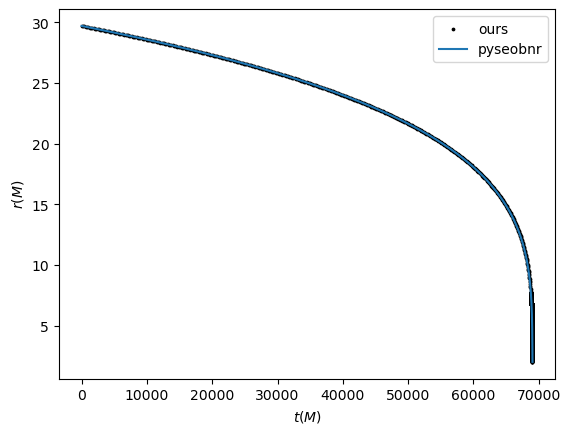

In [1]:
import numpy as np
import matplotlib.pyplot as plt

dynamics_ours = np.loadtxt("our_dynamics_q2_chi1_2_chi21.dat")
dynamics_pyseobnr = np.loadtxt("pyseobnr_dynamics_q2_chi1_2_chi21.dat")

plt.scatter(dynamics_ours[:,0],dynamics_ours[:,1],color = "black",s = (1./72.)**-0.25,label = 'ours')
plt.plot(dynamics_pyseobnr[:,0],dynamics_pyseobnr[:,1],label = 'pyseobnr')
plt.xlabel(r'$t(M)$')
plt.ylabel(r'$r(M)$')
plt.legend()
plt.savefig('r_comparison_q2_chi1_2_chi2_1.png',dpi = 200)

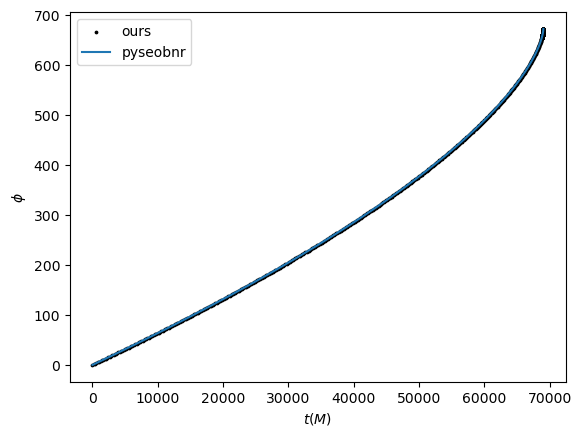

In [2]:
plt.scatter(dynamics_ours[:,0],dynamics_ours[:,2],color = "black",s = (1./72.)**-0.25,label = 'ours')
plt.plot(dynamics_pyseobnr[:,0],dynamics_pyseobnr[:,2],label = 'pyseobnr')
plt.xlabel(r'$t(M)$')
plt.ylabel(r'$\phi$')
plt.legend()
plt.savefig('phi_comparison_q2_chi1_2_chi2_1.png',dpi = 200)

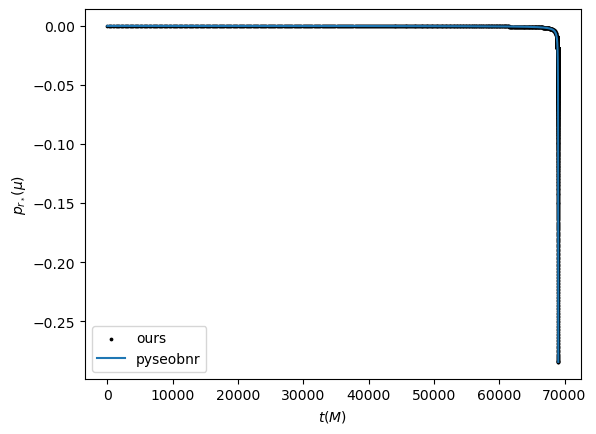

In [3]:
plt.scatter(dynamics_ours[:,0],dynamics_ours[:,3],color = "black",s = (1./72.)**-0.25, label = 'ours')
plt.plot(dynamics_pyseobnr[:,0],dynamics_pyseobnr[:,3], label = 'pyseobnr')
plt.xlabel(r'$t(M)$')
plt.ylabel(r'$p_{r_*}(\mu)$')
plt.legend()
plt.savefig('prstar_comparison_q2_chi1_2_chi2_1.png',dpi = 200)

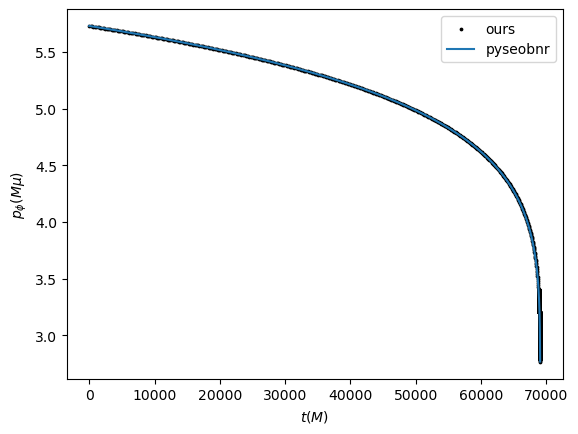

In [4]:
plt.scatter(dynamics_ours[:,0],dynamics_ours[:,4],color = "black",s = (1./72.)**-0.25,label = 'ours')
plt.plot(dynamics_pyseobnr[:,0],dynamics_pyseobnr[:,4], label = 'pyseobnr')
plt.xlabel(r'$t(M)$')
plt.ylabel(r'$p_{\phi}(M\mu)$')
plt.legend()
plt.savefig('pphi_comparison_q2_chi1_2_chi2_1.png',dpi = 200)